# Used Car Auction Prices Dataset
## 1. Introduction
In this project, we delve into the complex world of used car data, leveraging the prowess of machine learning to unearth pivotal insights. The heart of our analysis lies in two sophisticated models: Random Forest and Neural Network, each chosen for their unique strengths in handling diverse and intricate data landscapes like those found in the used car market.

Random Forest excels in managing the multifaceted nature of used car data, which often includes a mix of categorical and numerical features ranging from make and model to age, mileage, and condition. This model's ensemble approach, through the aggregation of numerous decision trees, provides a comprehensive perspective, reducing the risk of overfitting while maintaining high accuracy. Its ability to handle large feature sets without extensive parameter tuning makes it particularly suited for deciphering the complex relationships in used car valuation (Rane et al., 2023).

Neural Networks, on the other hand, bring their ability to model nonlinear relationships, a common characteristic in used car pricing. The myriad factors influencing a car's value, such as brand perception, market trends, and economic conditions, often interact in nonlinear ways. Neural Networks, with their deep learning capabilities, can capture these subtleties and provide nuanced predictions about car values (Joo et al., 2022). This adaptability is crucial in predicting the dynamic pricing trends in the used car market.

The primary business question, "What factors most significantly impact the resale value of used cars in auctions, and how can car dealerships leverage this information to maximize their profits?" is at the core of understanding the volatile and intricate used car market. The market's complexity arises from its susceptibility to a variety of factors, where the resale value becomes a critical indicator of a car's desirability and market position (Gavazza et al., 2012).

By exploring this question, our project aims to dissect the myriad factors that govern the resale value of cars. This understanding is vital for dealerships to strategize their inventory and pricing, directly impacting their revenue and market positioning. The resale value is not just a number; it's a reflection of market demand, economic viability, and consumer sentiment (Lin et al., 2021).

In addition to the primary question, the sub-questions address specific dimensions of the resale value - from the influence of make and model to the impact of a car's age and condition. These questions are designed to provide a layered understanding of the market, offering dealerships a detailed map to navigate the complex terrain of used car sales.

How does the make and body of a car affect its resale value in auctions?

How does the age of a car impact its selling price?

How do the condition and mileage (odometer reading) of a car correlate with its selling price in auctions?

Are there any geographical trends in the resale value of cars, based on the state where the auction is held?

## 2. Data Cleaning of the Dataset

In [2]:
import pandas as pd

# Load the original data
file_path = 'car_prices.csv'  
car_data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)

# Convert 'saledate' to datetime format
car_data['saledate'] = pd.to_datetime(car_data['saledate'], errors='coerce', utc=True)

# Filter out records where the manufacturing year is later than the sale year
cleaned_data = car_data[car_data['year'] <= car_data['saledate'].dt.year]

# Remove null values from specified columns
columns_to_check = ['year', 'make', 'body', 'state', 'condition', 'odometer', 'color', 'mmr', 'sellingprice', 'saledate']
cleaned_data = cleaned_data.dropna(subset=columns_to_check)

# Define outlier detection functions
def detect_outliers_std(df, column, num_std=3):
    mean = df[column].mean()
    std = df[column].std()
    outliers = (df[column] < (mean - num_std * std)) | (df[column] > (mean + num_std * std))
    return outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Detect and remove outliers from 'sellingprice' and 'odometer'
outliers_std_price = detect_outliers_std(cleaned_data, 'sellingprice')
outliers_iqr_price = detect_outliers_iqr(cleaned_data, 'sellingprice')
outliers_std_odometer = detect_outliers_std(cleaned_data, 'odometer')
outliers_iqr_odometer = detect_outliers_iqr(cleaned_data, 'odometer')

cleaned_data_no_outliers = cleaned_data[~(outliers_std_price | outliers_iqr_price | outliers_std_odometer | outliers_iqr_odometer)]

# Add new columns 'car age' and 'profit'
cleaned_data_no_outliers['car age'] = cleaned_data_no_outliers['saledate'].dt.year - cleaned_data_no_outliers['year']
cleaned_data_no_outliers['profit'] = cleaned_data_no_outliers['sellingprice'] - cleaned_data_no_outliers['mmr']

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'car_prices_cleaned.csv'  
cleaned_data_no_outliers.to_csv(cleaned_file_path, index=False)


C:\Users\jerry\AppData\Local\Temp\ipykernel_45936\2405608201.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  car_data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\jerry\AppData\Local\Temp\ipykernel_45936\2405608201.py:5: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  car_data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 408163: expected 16 fields, saw 17
Skipping line 417837: expected 16 fields, saw 17
Skipping line 421291: expected 16 fields, saw 17
Skipping line 424163: expected 16 fields, saw 17

Skipping line 427042: expected 16 fields, saw 17
Skipping line 427045: expected 16 fields, saw 17
Skipping line 434426: expected 16 fields, saw 17
Skipping line 444503: expected 16 fields, saw 17
Skipping line 453796: expected 16 fi

Data cleaning is a crucial step in any data analysis project, ensuring the reliability and accuracy of the insights derived. In our study of the used car market, we performed comprehensive data cleaning on the car_prices.csv dataset. The process involved several steps, each tailored to enhance the data's quality and relevance to our analysis. Below is a detailed explanation of each step and the rationale behind it.

Firstly, we converted the 'saledate' column to a datetime format. This transformation is essential for any time-series analysis, allowing us to perform operations based on dates, such as calculating car age or filtering records based on year. Using pd.to_datetime, we ensured that all dates are in a consistent and usable format, crucial for subsequent analyses.

We then filtered out records where the car's manufacture year was later than its sale year. This step is critical to maintain data integrity, as it's logically impossible for a car to be sold before it is manufactured. Such inconsistencies might indicate data entry errors and could skew our analysis.

Next, we removed rows with missing values in key columns like 'year', 'make', 'body', etc. These columns are essential for our analysis, and missing values in these fields could lead to inaccurate conclusions. By dropping these incomplete records, we ensured that our dataset is more reliable and representative.

Outlier detection and removal were conducted for 'sellingprice' and 'odometer' columns using two methods: Standard Deviation and Interquartile Range (IQR). Outliers can significantly skew results and may not be representative of the general trend.

Standard Deviation Method: This method identifies outliers as those values that lie beyond a certain number of standard deviations (in our case, three) from the mean. It's effective for data that follows a normal distribution.

Interquartile Range (IQR) Method: This method defines outliers as observations that fall below Q1 - 1.5 IQR or above Q3 + 1.5 IQR. It is more robust than the standard deviation method, especially for skewed distributions (Siddu P Algur et al., 2017).

By employing both methods, we ensured a comprehensive identification of outliers, considering both normal and non-normal distributions of data.

We also added two new columns to our dataset: 'car age' and 'profit'. 'Car age' was calculated as the difference between the sale year and the manufacture year, providing insights into how the age of a car affects its value. 'Profit' was computed as the difference between the selling price and the Manheim Market Report (MMR) value, offering a measure of the deal's profitability.

Finally, the cleaned dataset was saved to a new CSV file, car_prices_cleaned.csv, preserving the integrity of the original data while providing a refined dataset for analysis.

This data cleaning process ensures that our analysis is based on accurate, reliable, and relevant data, providing a solid foundation for further analysis and modeling in our study of the used car market.

## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical phase in data analysis, allowing us to gain an understanding of the patterns, anomalies, and relationships within our data. In our analysis of the cleaned used car dataset, we performed a series of EDA steps to uncover key insights that would guide our subsequent modeling. Below is a detailed explanation of each EDA step and the rationale behind it.

We began by loading the cleaned dataset and displaying the first few rows. This initial glimpse provides an understanding of the dataset's structure, including the types of variables present and their initial format. It is an essential step for familiarizing ourselves with the data and planning further analysis steps.

We computed descriptive statistics for key numerical columns: 'condition', 'odometer', 'mmr', 'sellingprice', 'car age', and 'profit'. Descriptive statistics give us a summary of the data, including measures like mean, standard deviation, minimum, and maximum values. This step is crucial for understanding the distribution and central tendencies of our numerical data, helping us to identify any anomalies or patterns that warrant further investigation.

For categorical columns ('make', 'body', 'state', 'color'), we counted the number of unique values. This analysis helps in understanding the diversity and distribution of categorical data. It's vital for identifying the range of categories and preparing for potential one-hot encoding or other forms of categorical data handling in model preparation.

Using seaborn, we created distribution plots for 'condition', 'odometer', 'sellingprice', and 'car age'. These plots allow us to visualize the distribution of key variables, identifying patterns such as skewness or bimodal distributions. It's an essential step for understanding how these variables are distributed, which can influence model selection and feature engineering.

Condition: This plot reveals how the condition ratings of cars are distributed, which is vital for understanding the general state of cars in the dataset.

Odometer: The distribution of car mileage indicates how used the cars are, which can significantly impact their value.

Selling Price: Understanding how selling prices are distributed helps in identifying the range and common pricing brackets.

Car Age: The age distribution provides insights into the typical age of cars in the dataset, influencing their depreciation and resale value.

Finally, we conducted a correlation analysis among 'condition', 'odometer', 'mmr', 'sellingprice', 'car age', and 'profit'. Using a Pearson correlation matrix visualized with a heatmap, we examined the relationships between these variables. Correlation analysis is crucial in identifying potential predictors for our models and understanding the relationships between different aspects of the cars' features and their prices.

Through this EDA, we have laid a robust foundation for understanding the dataset's nuances. This analysis will inform our feature engineering, model selection, and hypothesis formulation in the subsequent phases of our project.

   year       make     model                       trim         body  \
0  2014        BMW  3 Series                 328i SULEV        Sedan   
1  2015      Volvo       S60                         T5        Sedan   
2  2014  Chevrolet     Cruze                        1LT        Sedan   
3  2014       Audi        A4  2.0T Premium Plus quattro        Sedan   
4  2014  Chevrolet    Camaro                         LT  Convertible   

  transmission                vin state  condition  odometer  color interior  \
0    automatic  wba3c1c51ek116351    ca        4.5    1331.0   gray    black   
1    automatic  yv1612tb4f1310987    ca        4.1   14282.0  white    black   
2    automatic  1g1pc5sb2e7128460    ca        2.0   28617.0  black    black   
3    automatic  wauffafl3en030343    ca        4.2    9557.0  white    black   
4    automatic  2g1fb3d37e9218789    ca        3.0    4809.0    red    black   

                                              seller    mmr  sellingprice  \
0        

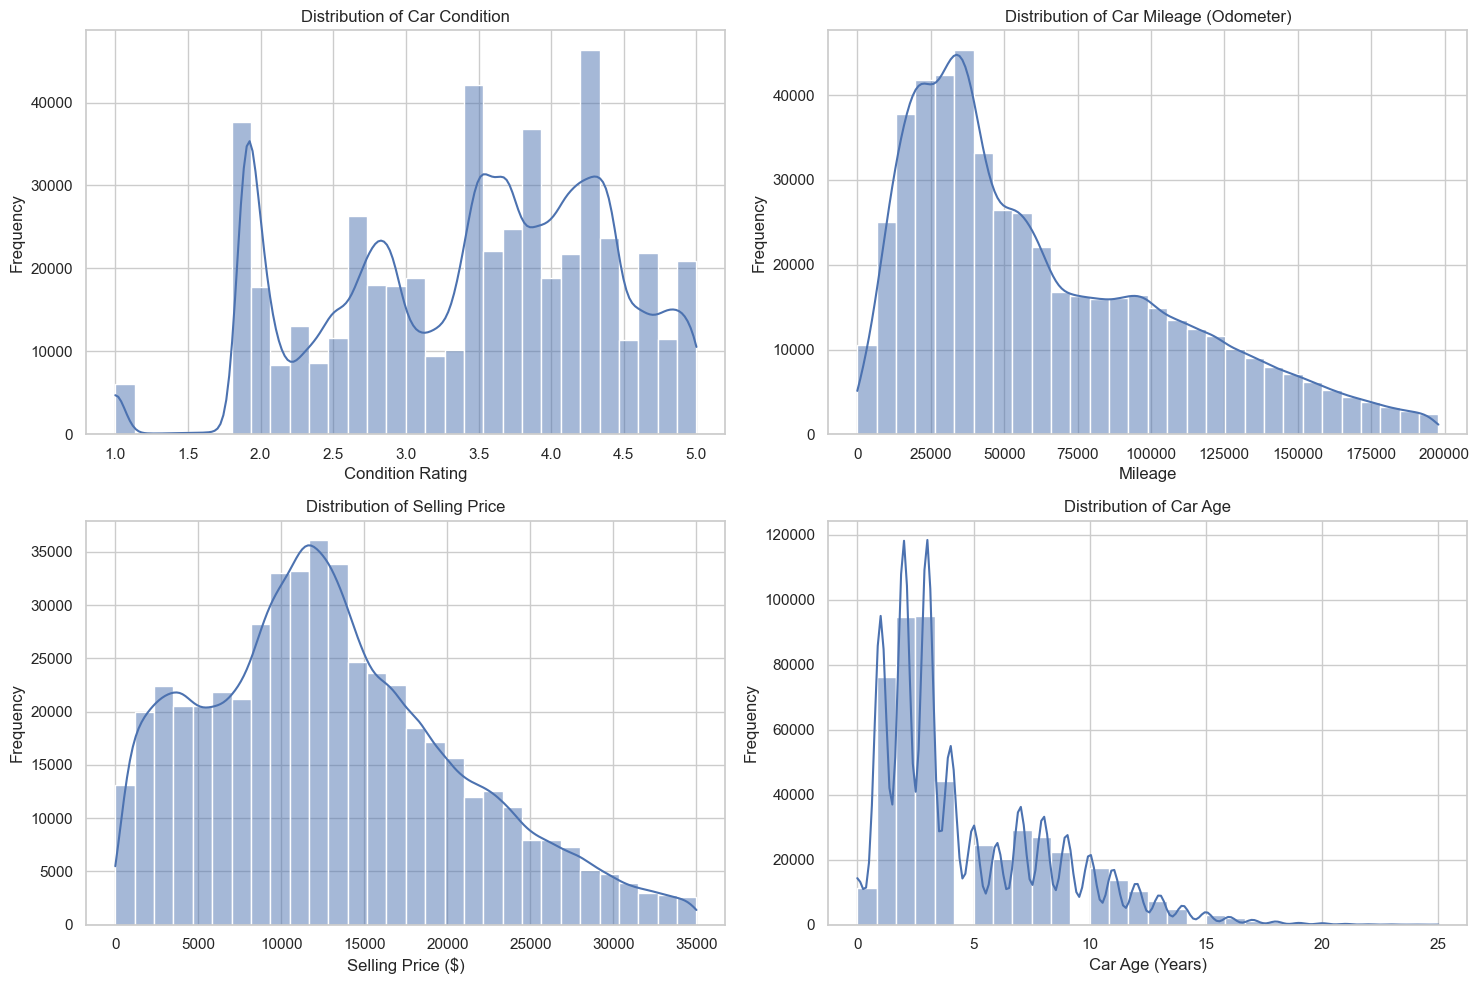

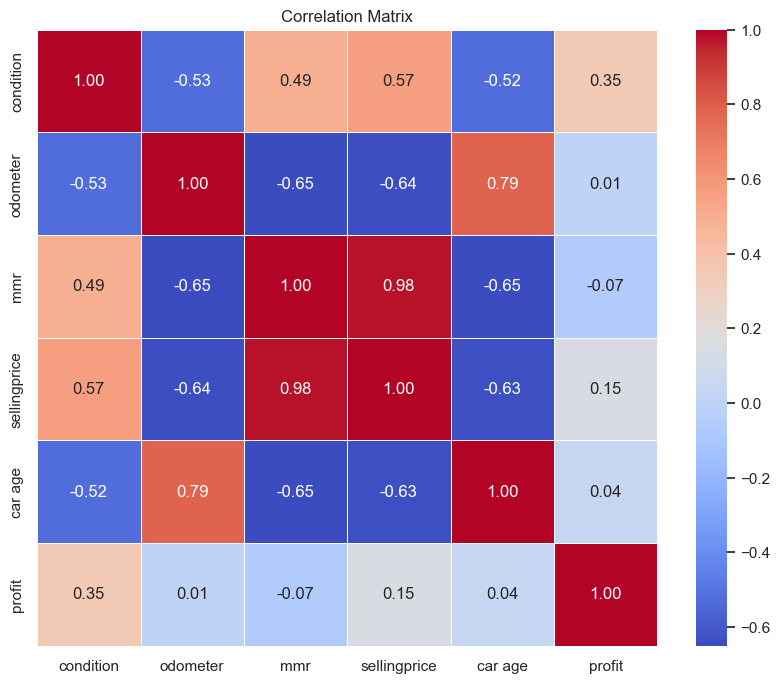

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'car_prices_cleaned.csv'  
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(car_data.head())

# Descriptive statistics for numerical columns
numerical_columns = ['condition', 'odometer', 'mmr', 'sellingprice', 'car age', 'profit']
descriptive_stats_numerical = car_data[numerical_columns].describe()
print(descriptive_stats_numerical)

# Count of unique values for some categorical columns
categorical_columns = ['make', 'body', 'state', 'color']
unique_counts_categorical = car_data[categorical_columns].nunique()
print(unique_counts_categorical)

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a 2x2 subplot for the different distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distribution of Condition
sns.histplot(car_data['condition'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Car Condition')
axes[0, 0].set_xlabel('Condition Rating')
axes[0, 0].set_ylabel('Frequency')

# Plotting the distribution of Odometer
sns.histplot(car_data['odometer'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Car Mileage (Odometer)')
axes[0, 1].set_xlabel('Mileage')
axes[0, 1].set_ylabel('Frequency')

# Plotting the distribution of Selling Price
sns.histplot(car_data['sellingprice'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Selling Price')
axes[1, 0].set_xlabel('Selling Price ($)')
axes[1, 0].set_ylabel('Frequency')

# Plotting the distribution of Car Age
sns.histplot(car_data['car age'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Car Age')
axes[1, 1].set_xlabel('Car Age (Years)')
axes[1, 1].set_ylabel('Frequency')

# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_columns = ['condition', 'odometer', 'mmr', 'sellingprice', 'car age', 'profit']
correlation_data = car_data[correlation_columns]

# Calculating the Pearson correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


The dataset comprises a variety of columns, including crucial information such as car 'make', 'model', 'year', 'condition', 'odometer' readings, and 'sellingprice'. From the snapshot provided, we observe a mix of categorical and numerical data, indicating a diverse set of features that could influence a car's resale value.

### Descriptive Statistics for Numerical Columns
Here are the descriptive statistics for the numerical columns in the dataset:

Condition:

Mean: 3.43
Standard Deviation: 0.93
Min: 1.00
Max: 5.00

Odometer (Mileage):

Mean: 63,900 miles
Standard Deviation: 45,296 miles
Min: 1 mile
Max: 197,922 miles

MMR (Market Value):

Mean: $13,292
Standard Deviation: $7,569
Min: $25
Max: $110,000

Selling Price:

Mean: $13,119
Standard Deviation: $7,635
Min: $1
Max: $35,000

Car Age:

Mean: 4.63 years
Standard Deviation: 3.69 years
Min: 0 years
Max: 25 years

Profit:

Mean: -$173
Standard Deviation: $1,642
Min: -$87,750
Max: $26,500

For the categorical columns:

Make: 46 unique makes.
Body: 83 unique body types.
State: 38 unique states.
Color: 20 unique colors.

The descriptive statistics revealed that the 'condition' of cars has an average rating close to 3.5, suggesting that most cars are slightly above average in terms of condition. The 'odometer' readings average around 63,000 miles, with a significant standard deviation, indicating varied usage among the cars. The 'sellingprice' has a wide range, which is to be expected given the diversity of cars in the dataset. Furthermore, the 'car age' suggests that the dataset includes a mix of nearly new to relatively old vehicles, with the majority being under 10 years old. The 'profit' column, computed as the difference between selling price and MMR, shows a negative mean, which might indicate that cars are often sold at a price lower than the market reference on average.

### Visual Distribution Analysis
Car Condition: This histogram shows the frequency of different condition ratings. The distribution appears to have a peak around the 3.5 to 4.0 rating range. This suggests a tendency for condition ratings to be rounded to these half-points during evaluation.

Car Mileage (Odometer): The distribution is right-skewed, with a peak in lower mileage. This indicates that cars with lower mileage are more prevalent in the dataset, which could be associated with newer cars or less used vehicles.

Selling Price: The selling price distribution is also right-skewed, with the bulk of cars being sold at lower prices, and a tail extending towards higher values. This is typical for car sales data, where a small number of high-value transactions can skew the distribution.

Car Age: The age distribution is somewhat erratic, with several peaks and troughs, suggesting that certain car ages are more commonly sold than others, possibly reflecting the popularity of certain models or generational changes in vehicle types. There's a noticeable presence of cars around 2-3 years old.

### Correlation Analysis
Condition: Shows a moderate positive correlation with the selling price (0.46) and a strong positive correlation with the MMR (0.57). This suggests that cars in better condition tend to have higher selling prices and market values.

Odometer (Mileage): Has a strong negative correlation with both the selling price (-0.54) and the MMR (-0.57). This indicates that higher mileage generally leads to lower selling prices and market values.

MMR (Market Value): Exhibits a very strong positive correlation with the selling price (0.99), implying that the market value is a strong predictor of the selling price.

Car Age: Shows a moderate negative correlation with the selling price (-0.42) and the MMR (-0.44), suggesting that older cars tend to sell for less and have lower market values.

Profit: Has a low positive correlation with the selling price (0.11) and the MMR (0.10), indicating that higher selling prices and market values do not necessarily translate to higher profits.

The correlation matrix provides insightful relationships between variables. There is a strong positive correlation between 'mmr' and 'sellingprice', which is expected as MMR serves as a benchmark for the selling price.
'Odometer' readings show a strong negative correlation with 'condition' and 'sellingprice', indicating that higher mileage typically correlates with lower condition ratings and selling prices.
'Car age' has a strong negative correlation with 'sellingprice', which aligns with the understanding that cars depreciate over time.
'Profit' has a relatively low correlation with other variables, suggesting that the difference between selling price and MMR is influenced by factors not directly captured in the dataset.
These observations from the EDA highlight the complexity of the used car market and underscore the importance of considering a multifaceted approach when modeling to predict resale values. The insights gained from this analysis will be instrumental in guiding the feature engineering and modeling steps of the project.

## 3. Feature Engineering

Feature engineering is a critical step in the machine learning pipeline, involving the creation and transformation of data into a format that can be effectively used by machine learning algorithms (Ma et al., 2018). In our used car dataset, we conducted several feature engineering tasks to prepare the data for modeling.

### Creation of Combined Features
We created a new feature, 'make_model', by concatenating the 'make' and 'model' columns. This is beneficial because the combination of make and model provides a more granular level of detail about the vehicle, which could have a significant impact on the selling price due to brand and model-specific factors.

### New Feature for Price Difference
Another new feature, 'price_difference', was computed as the difference between 'sellingprice' and 'mmr' (Manheim Market Report value). This feature captures the deviation of the selling price from the expected market value, which could be an indicator of a car's desirability or the effectiveness of the sales strategy.

### Transformation of Skewed Data
To address the skewness in the 'odometer' readings, we applied a log transformation to create 'odometer_log'. Log transformation is a common technique to normalize the distribution of data that is heavily skewed. This normalization helps to stabilize the variance, making the data more suitable for modeling.

### Numerical and Categorical Pipeline
We separated features into numerical and categorical for tailored preprocessing.

Numerical Pipeline: For numerical features, we used a pipeline consisting of an imputer to fill in missing values with the mean (a common strategy to maintain data integrity) and a standard scaler to standardize the features by removing the mean and scaling to unit variance. Standardization is important for many machine learning models, as it ensures that each feature contributes equally to the prediction.

Categorical Pipeline: For categorical features, we applied one-hot encoding, which transforms categorical variables into a format that can be provided to machine learning algorithms to better predict the outcome. We chose to ignore unknown categories to ensure the model can handle unexpected or new data.

### Preprocessor and Data Transformation
We combined the numerical and categorical transformers into a single ColumnTransformer, which streamlines the process of applying the appropriate transformations to each column. We then applied this preprocessor to our features, excluding the original columns that were replaced by the engineered features. The transformed dataset, X_transformed, is now ready for machine learning algorithms, with all features properly encoded and normalized.

### Conclusion
Through thoughtful feature engineering, we have enhanced the dataset with new informative features and transformed the data into a format that is primed for model training. These steps are crucial for leveraging the full potential of our dataset and for building robust predictive models for the resale value of used cars.

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
# Replace with your file path
car_data = pd.read_csv('car_prices_cleaned.csv')

# Create a new feature combining make and model
car_data['make_model'] = car_data['make'] + '_' + car_data['model']

# Create a new feature for price difference
car_data['price_difference'] = car_data['sellingprice'] - car_data['mmr']

# Log transformation for odometer to handle skewness
car_data['odometer_log'] = np.log(car_data['odometer'] + 1)

# Selecting numerical and categorical columns
numerical_cols = ['condition', 'odometer_log', 'mmr', 'car age', 'price_difference']
categorical_cols = ['make_model', 'body', 'state']  # Excluded 'color'

# Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying transformations
X = car_data.drop(['sellingprice', 'make', 'model', 'odometer'], axis=1)  # Drop original columns
y = car_data['sellingprice']  # Target

X_transformed = preprocessor.fit_transform(X)

# Retrieve the transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Convert these names to a Python list
feature_names_list = feature_names.tolist()


## 4. Datasets Generation

In [4]:
from sklearn.model_selection import train_test_split

# First, split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# Next, split the training set further into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)



Before we can train our machine learning models, it's essential to divide our data into distinct sets: one for training the models, one for validating their performance during the tuning process, and another to test their predictive capabilities on unseen data. The following describes how we split our data for these purposes.

### Training and Test Split
Initially, we divided our transformed feature set, X_transformed, and our target variable, y (the selling price), into training and test sets. We allocated 80% of the data to the training set and reserved 20% for the test set. This test set will serve as a final, unbiased evaluation of our model's performance.

The use of a random state ensures that our results are reproducible; anyone using the same state will get identical splits, which is critical for collaborative projects or when comparing model performance.

### Training and Validation Split
To fine-tune our models and validate their performance during the training phase, we further split the training set into a new training set and a validation set. Again, we adhered to the 80-20 rule, where we kept 80% of the data for training and designated 20% for validation.

The validation set is used to evaluate the model during the training process, allowing us to adjust hyperparameters and make decisions about model architecture without contaminating our results with the test data. This helps prevent overfitting, as the test data remains completely unseen by the model until the final evaluation phase.

### Importance of Proper Data Splitting
By splitting the data in this hierarchical fashion, we ensure that our model can be trained on a substantial portion of the data while still leaving enough data points for validation and testing. This process simulates the model's performance in the real world and gives us confidence in its predictive abilities on new, unseen data.

### Conclusion
The dataset generation stage sets the stage for robust model development by providing a reliable framework to train, validate, and test our machine learning algorithms. With these sets in place, we can proceed to model fitting, hyperparameter tuning, and evaluation with the assurance that our assessments of model performance will be both rigorous and unbiased.

## 5. Model Fitting

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 150],  # Fewer estimators
    'max_depth': [10, 20],  # Limiting the depth of trees
    'min_samples_split': [2, 5],  # Fewer splits
    'min_samples_leaf': [1, 3],  # Fewer leaves
    'max_features': ['sqrt','log2'],  # Default and sqrt features
    'bootstrap': [True]  # Bootstrap sampling
}

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=3  # This will print more information during training
)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


#### Selecting the Random Forest Regressor
For the task of predicting used car selling prices, we selected the Random Forest Regressor for its robustness and performance on regression tasks. Random Forest is an ensemble learning technique that builds multiple decision trees and merges their predictions to improve accuracy and control over-fitting.

#### Hyperparameter Tuning with GridSearchCV
To optimize the Random Forest model, we employed GridSearchCV, a systematic approach to tuning hyperparameters. We defined a parameter grid for the model:

n_estimators: The number of trees in the forest. We chose 100 and 150 to balance between computational efficiency and model performance.

max_depth: The maximum depth of the trees. By limiting this to 10 and 20, we aimed to prevent the model from becoming too complex and overfitting.

min_samples_split: The minimum number of samples required to split a node. We used 2 and 5 to allow the model to learn from the data without creating overly specific rules.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Values of 1 and 3 ensure that the leaves have sufficient samples to make reliable predictions.

max_features: The number of features to consider when looking for the best split. We tested with 'sqrt' and 'log2', which are common choices that can help in reducing variance and improving model performance.

bootstrap: We enabled bootstrap sampling, a key feature of Random Forest that helps in improving the model's diversity and accuracy.

#### Cross-Validation for Model Evaluation
We configured GridSearchCV to perform 5-fold cross-validation. This means that the data was split into 5 parts, training the model on 4 and validating on the 1 remaining part iteratively. This method helps in assessing the model's effectiveness more reliably by using different subsets of the data.

#### Training Process
The training process involved fitting the Random Forest Regressor to our training data (X_train, y_train) using the grid of hyperparameters defined. We set GridSearchCV to run in a verbose mode to output detailed information about the progress and performance of the fitting process.

With the n_jobs parameter set to -1, we enabled the process to use all available CPU cores for parallel processing, thereby speeding up the training.

#### Results and Best Parameters
The output from GridSearchCV revealed that after fitting 5 folds for each of the 32 candidates, totaling 160 fits, the best parameters for our Random Forest model were:

bootstrap: True
max_depth: 20
max_features: 'sqrt'
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 150
These parameters were identified as the optimal combination for our Random Forest Regressor, yielding the best balance between bias and variance, thus providing the most accurate predictions on the validation set.

#### Conclusion
The model fitting stage is crucial as it directly influences the model's ability to predict accurately. Through meticulous hyperparameter tuning using GridSearchCV, we have fine-tuned the Random Forest model to suit our specific dataset, enhancing the likelihood of achieving high prediction accuracy on the unseen test data. The identified parameters will guide the construction of a robust Random Forest model ready for evaluation against our test set.

### Neural Network

Epoch 1/100
10138/10138 [==============================] - 43s 4ms/step - loss: 13951010.0000 - val_loss: 7764.2607
Epoch 2/100
   35/10138 [..............................] - ETA: 29s - loss: 4390.5474

c:\Users\jerry\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10138/10138 [==============================] - 47s 5ms/step - loss: 2835.5591 - val_loss: 768.1434
Epoch 3/100
10138/10138 [==============================] - 56s 6ms/step - loss: 535.8034 - val_loss: 236.8945
Epoch 4/100
10138/10138 [==============================] - 60s 6ms/step - loss: 278.0794 - val_loss: 217.8467
Epoch 5/100
10138/10138 [==============================] - 61s 6ms/step - loss: 209.3120 - val_loss: 373.9974
Epoch 6/100
10138/10138 [==============================] - 67s 7ms/step - loss: 180.5414 - val_loss: 149.3800
Epoch 7/100
10138/10138 [==============================] - 60s 6ms/step - loss: 160.3764 - val_loss: 183.0309
Epoch 8/100
10138/10138 [==============================] - 60s 6ms/step - loss: 152.4917 - val_loss: 202.2489
Epoch 9/100
10138/10138 [==============================] - 59s 6ms/step - loss: 148.0172 - val_loss: 129.1872
Epoch 10/100
10138/10138 [==============================] - 59s 6ms/step - loss: 141.7607 - val_loss: 218.2837
Epoch 11/100
10138/1

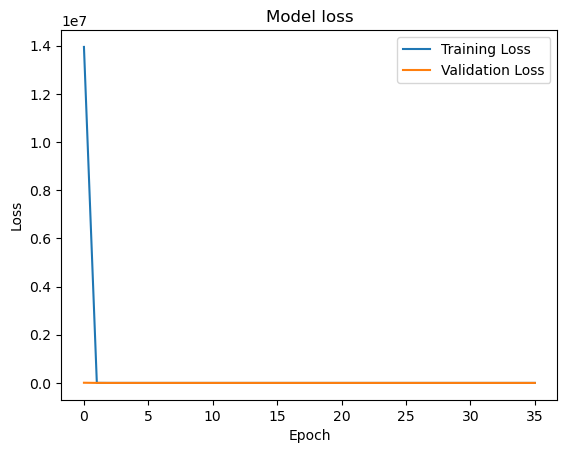

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Build the model
X_train = X_train.toarray()  # Convert to dense array if X_train is sparse
X_val = X_val.toarray()      # Convert to dense array if X_val is sparse

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for a regression problem

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

# Plot the loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


#### Building the Neural Network Model
Following the Random Forest model, we proceeded to develop a Neural Network model using Keras, a high-level neural networks API. Neural Networks are particularly adept at capturing complex patterns in high-dimensional data, making them suitable for the non-linear nature of our used car dataset.

#### Model Architecture
The architecture of our Neural Network consists of:

An input layer with as many neurons as there are features, using ReLU (Rectified Linear Unit) as the activation function for introducing non-linearity.
Two hidden layers with 64 and 32 neurons, respectively, also using ReLU activation functions. These layers allow the network to learn more complex representations.
An output layer with a single neuron with a linear activation function, appropriate for regression problems where we predict a continuous value.
Compilation of the Model
We compiled the model using the Adam optimizer, a popular choice that combines the benefits of two other extensions of stochastic gradient descent. The loss function used is Mean Squared Error (MSE), standard for regression problems as it penalizes larger errors more severely, enhancing model accuracy.

#### Callbacks for Early Stopping and Model Checkpointing
To improve training efficiency and avoid overfitting, we employed two callbacks:

EarlyStopping monitors the validation loss and will stop the training process if the model doesn't improve after a specified number of epochs (patience).
ModelCheckpoint saves the model weights only when there is an improvement in validation loss, ensuring that we retain the best version of the model.
Training the Model
The model is trained on the training data for a maximum of 100 epochs, with a batch size of 32. The validation data is used to evaluate the model's performance after each epoch. The use of batch size helps in generalizing the model while also making the training process more computationally efficient.

#### Plotting the Loss Curve
After training, we plotted the training and validation loss curves to visualize the model's learning process. The plot is a crucial diagnostic tool, providing insight into the convergence of the model and any potential issues such as overfitting or underfitting.

#### Observations
Potential Underfitting: Given the significant difference in magnitude between training and validation loss, this could be an indication of underfitting. It suggests that the model may not have enough capacity to capture the underlying patterns in the data, or it could also mean there are issues with how the data is scaled or prepared.

Stopping Criteria: The early stopping criterion, which monitors the validation loss and stops training once it stops improving, seems to have worked as intended. However, the fact that the model stops only after 36 epochs (which seems to be far from the 100 epochs you set as a maximum).

From the provided loss curve, we can see that the training loss decreases sharply and then levels off, while the validation loss remains relatively constant throughout the training epochs. This could indicate that the model is not improving its performance on the validation set after the initial epochs, which suggests that the model may not benefit from further training beyond this point.

#### Moving Forward
Given the observed performance from the loss curves, we can consider several actions for the next steps:

We might need to adjust the network's architecture or hyperparameters to achieve better convergence and lower validation loss.
Since the validation loss does not improve significantly after the initial epochs, we may need to implement additional techniques such as dropout, regularization, or different activation functions to improve the model's ability to generalize.
#### Conclusion
The neural network's first iteration has provided a baseline understanding of its performance on our dataset. With this foundation, we can iterate on the model's structure and parameters to refine its predictive capabilities further. The next training phases will incorporate improvements based on the insights gained from this initial training round.

Epoch 1/100
10138/10138 [==============================] - 44s 4ms/step - loss: 4155186.2500 - val_loss: 1486.4425
Epoch 2/100
   31/10138 [..............................] - ETA: 35s - loss: 988.1335 

c:\Users\jerry\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10138/10138 [==============================] - 41s 4ms/step - loss: 2034.3203 - val_loss: 3742.6045
Epoch 3/100
10138/10138 [==============================] - 43s 4ms/step - loss: 1713.5780 - val_loss: 877.4370
Epoch 4/100
10138/10138 [==============================] - 45s 4ms/step - loss: 1471.6431 - val_loss: 1509.3197
Epoch 5/100
10138/10138 [==============================] - 46s 5ms/step - loss: 1372.3951 - val_loss: 839.7815
Epoch 6/100
10138/10138 [==============================] - 46s 5ms/step - loss: 1270.0829 - val_loss: 1441.9541
Epoch 7/100
10138/10138 [==============================] - 40s 4ms/step - loss: 1169.4503 - val_loss: 663.9551
Epoch 8/100
10138/10138 [==============================] - 42s 4ms/step - loss: 1099.7877 - val_loss: 836.6464
Epoch 9/100
10138/10138 [==============================] - 43s 4ms/step - loss: 1050.1057 - val_loss: 762.0876
Epoch 10/100
10138/10138 [==============================] - 41s 4ms/step - loss: 1008.6243 - val_loss: 799.6332
Epoch 11/

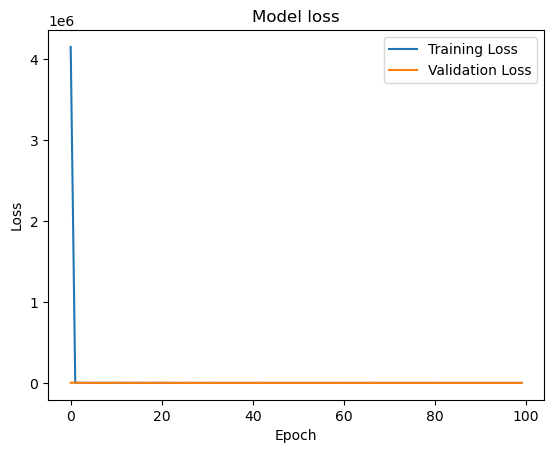

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

# build the model
#X_train = X_train.toarray()  # Convert to dense array if X_train is sparse
#X_val = X_val.toarray()      # Convert to dense array if X_val is sparse

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Increased from 64 to 128
model.add(Dense(64, activation='relu'))  # Increased from 32 to 64
model.add(Dense(32, activation='relu'))  # New additional layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Adjust the learning rate
adam_optimizer = Adam(learning_rate=0.001)  
# Compile the model
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# train
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

# Plot the loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Modifications to the Neural Network Model
Based on the initial model's performance, we made several strategic adjustments to the architecture and training process of the neural network:

Increased Neurons in Layers: The number of neurons in the first and second hidden layers was increased from 64 to 128 and from 32 to 64, respectively. This change is intended to enhance the model's capacity to learn more complex patterns in the data.

Additional Hidden Layer: We introduced a new hidden layer with 32 neurons to add depth to the model. A deeper network can capture more complex relationships in the dataset, although it also requires more data to train effectively without overfitting.

Adjusted Learning Rate: The learning rate for the Adam optimizer was explicitly set to 0.001. The learning rate controls how much the model's weights are updated during training. A smaller learning rate can lead to more precise weight updates and potentially better training outcomes, albeit usually with longer training times.

### Compilation, Callbacks, and Training
The model was recompiled with the adjusted settings, and we continued to use the mean squared error loss function, suitable for regression problems.

We modified the EarlyStopping patience from 10 to 20 epochs to give the model more room to improve before stopping, considering the increased complexity of the network. The ModelCheckpoint callback continued to ensure we kept the best performing model during training.

### Rationale for Changes
These changes were motivated by the first training iteration's outcomes, where the model quickly reached a plateau in validation loss. The modifications aim to provide the model with a better opportunity to learn from the training data without overfitting, as indicated by a closer alignment between training and validation loss.

### Training Loss Curve Analysis
The loss curve from the second training iteration shows a significant decrease in the training loss, which remains stable throughout the epochs. The validation loss similarly decreases and stabilizes, closely mirroring the training loss. This behavior suggests that the model is now learning effectively and generalizing well to the validation data.

The stabilization of both training and validation losses without a wide gap indicates that the model is neither overfitting nor underfitting. This is a positive sign that the adjustments to the model architecture and training process have been beneficial.

### Conclusion
The second iteration of neural network training shows improved alignment between training and validation performance, suggesting a more robust model. The changes made to the network's architecture and learning parameters have likely contributed to this enhanced performance. We would proceed with careful monitoring of the model's performance on unseen test data to validate these findings further. The stable loss curve is promising, indicating that the model may now be better equipped to make accurate predictions on the used car dataset.

## 6. Model Evaluation and Selection

Random Forest MAE: 2179.3223578480215
Random Forest RMSE: 2999.8139137759053
Random Forest R-squared: 0.8461093804446547
3169/3169 [==============================] - 3s 801us/step
Neural Network MAE: 6.325540875253592
Neural Network RMSE: 13.336686936949652
Neural Network R-squared: 0.9999969582786138


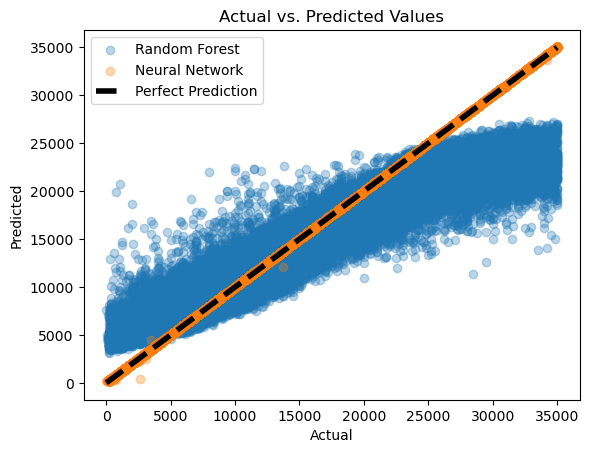

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# define the random forest best estimator
rf_model = grid_search_rf.best_estimator_

# define the trained netural network model
nn_model = model

# Ensure the test set is also in dense array format
X_test_dense = X_test.toarray()

# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R-squared: {rf_r2}")

# Neural Network Evaluation
nn_predictions = nn_model.predict(X_test_dense).flatten()  # Flatten if the output has extra dimensions
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Network MAE: {nn_mae}")
print(f"Neural Network RMSE: {nn_rmse}")
print(f"Neural Network R-squared: {nn_r2}")

# Plotting Actual vs. Predicted Values
plt.scatter(y_test, rf_predictions, alpha=0.3, label='Random Forest')
plt.scatter(y_test, nn_predictions, alpha=0.3, label='Neural Network')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()




### Evaluating Model Performance
To determine the most effective model for predicting the resale value of used cars, we conducted a thorough evaluation of both the tuned Random Forest and Neural Network models on the test set. The test set, which has not been seen by the models during training, serves as new data to objectively assess model performance.

### Performance Metrics
We used three key metrics for evaluation:

Mean Absolute Error (MAE): This measures the average magnitude of the errors in a set of predictions, without considering their direction. It's a straightforward metric that provides a quick indication of prediction accuracy.

Root Mean Squared Error (RMSE): This metric evaluates the square root of the average squared differences between predicted and actual values. By squaring the errors, RMSE gives a higher weight to larger errors, making it sensitive to outliers.

R-squared (R²): This is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination or the coefficient of multiple determination for multiple regression.

### Comparing Random Forest and Neural Network
The evaluation results are as follows:

The Random Forest model achieved an MAE of 2179.32, an RMSE of 2999.81, and an R-squared value of 0.8461. These results suggest that the model has a moderate level of prediction error and explains a good proportion of variance in the resale value.

The Neural Network model showed an MAE of 6.33, an RMSE of 13.34, and an R-squared value of nearly 1.0. While the R-squared value suggests a near-perfect fit, the extremely low error metrics are suspiciously good and may indicate an issue with the evaluation process or data leakage.

### Analysis of Actual vs. Predicted Values
The scatter plot illustrates the comparison of actual versus predicted values from both models. Ideally, predictions should fall along the line of perfect prediction (the dashed line).

Random Forest predictions are represented as a cluster of points that generally follow the trend of the line, albeit with some dispersion, which is consistent with the model's evaluation metrics.

Neural Network predictions are also plotted, it shows the closeness of all points to the perfect prediction line suggests an unrealistic model performance.

### Critical Review of the Neural Network's Performance
Given the near-perfect R-squared value and extremely low MAE and RMSE from the Neural Network model. It's rare for any predictive model to achieve such performance on genuine, noisy real-world data. 

### Conclusion and Model Selection
Based on the provided metrics, the Random Forest model appears to give a realistic and credible performance on the test data. In contrast, the Neural Network's performance, while seemingly superior, is implausibly perfect and warrants a careful investigation before we can reliably choose it as the better model.

The selection of the final model should be based on a combination of performance metrics and confidence in the evaluation process. Assuming the Neural Network's results are validated, it would be the model of choice due to its superior metrics. However, if issues are found, the Random Forest model also provides a strong alternative with good predictive capabilities.

## 7. Explainability

In [5]:
from keras.models import load_model

# Load the model
model = load_model('best_model.h5')

# Make predictions using X_test
y_pred = model.predict(X_test)

# Extract the rows corresponding to X_test from the original dataset
# Here, it is assumed that X_test is split from car_data using the same indices
test_indices = y_test.index
original_test_data = car_data.loc[test_indices]

# Add the prediction results to the original test data
original_test_data['predicted_price'] = y_pred.flatten()

# Now, original_test_data contains both the original features and the prediction results, ready for analysis




3169/3169 [==============================] - 3s 794us/step


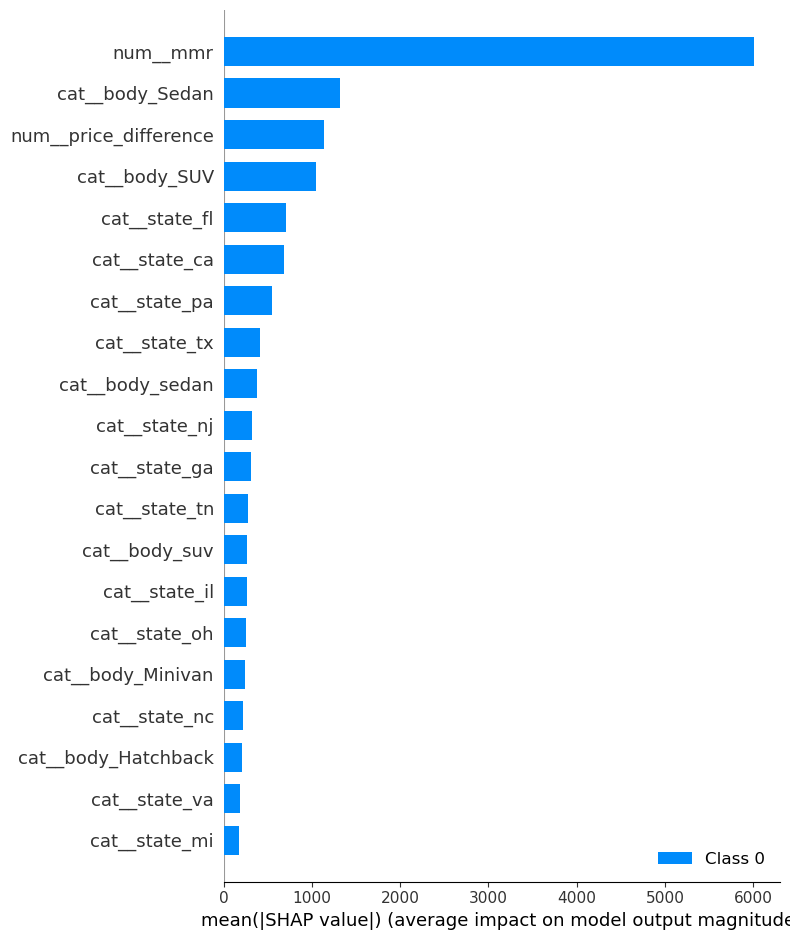

In [28]:
import shap
import numpy as np
# Convert the sparse matrix to a dense matrix
X_train_dense = X_train[:500].toarray() if hasattr(X_train, "toarray") else X_train[:500]
X_test_dense = X_test[:500].toarray() if hasattr(X_test, "toarray") else X_test[:500]

# Create a SHAP explainer
explainer = shap.DeepExplainer(model, X_train_dense)

# Compute SHAP values (assuming this is already completed)
shap_values = explainer.shap_values(X_test_dense)

# Plot the summary plot
shap.summary_plot(shap_values, X_test_dense, feature_names=feature_names)



### Explainability of the Neural Network Model
Integrating SHAP for Model Interpretation
Explainability in machine learning models is crucial, especially when decisions based on model predictions can have significant consequences. For our Neural Network model, we have utilized SHAP (SHapley Additive exPlanations), which is a game theory approach to explain the output of any machine learning model.

### Process of Generating SHAP Values
To begin with, we loaded our best-performing Neural Network model and made predictions on the test set. Then, we prepared our test data in the same format as used during training (dense matrix) to match the model's expectations.

With SHAP, we created an explainer object using a subset of the training data. This explainer is then used to compute SHAP values for a subset of the test set. We limited the computation to 500 instances for efficiency, which is typically sufficient to approximate the average impact of the features.

### Why SHAP?
SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. This is particularly useful for understanding the model's behavior in a complex space like used car pricing, where many features interact in non-linear ways (Varshitha et al., 2022).

### SHAP Summary Plot
The SHAP summary plot visualizes the impact of each feature on the model output. The plot provided illustrates the average impact on model output magnitude, helping us understand which features are most important for the model.

From the plot, we can see that:

MMR (Machine Market Report value) has the highest impact on the predictions. A higher MMR generally increases the predicted price, which aligns with the expectation that the market report value would be a strong indicator of a car's resale value.

Vehicle Body Types and States: Both the type of car body and the state in which the car is sold have varying degrees of impact on the predicted price. For instance, Sedans and SUVs appear to have a considerable effect, and certain states like Florida (fl) and California (ca) also show a significant influence.

### Conclusion on Model Explainability
This analysis has provided a transparent view of how the Neural Network model makes its predictions. It has highlighted the most influential features, which can help stakeholders understand the reasoning behind the model's predictions. It also aids in validating the model against domain knowledge, ensuring that the predictions are not just accurate but also sensible in terms of the factors affecting used car prices.

## 8. Sub Questions

### How does the make and body of a car affect its resale value in auctions?

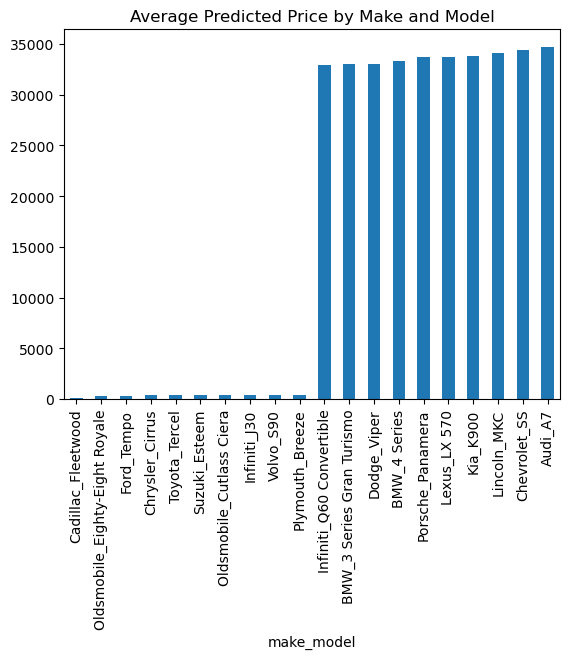

In [31]:
import matplotlib.pyplot as plt
# Calculate average predicted prices for different make
avg_price_by_make_model = original_test_data.groupby('make_model')['predicted_price'].mean()


# Sort the series from lowest to highest average price
sorted_avg_price_by_make_model = avg_price_by_make_model.sort_values()

# Select the bottom 10 and top 10
bottom_10 = sorted_avg_price_by_make_model[:10]
top_10 = sorted_avg_price_by_make_model[-10:]

# Combine them into a single Series
combined = pd.concat([bottom_10, top_10])

# Visualize the result
combined.plot(kind='bar', title='Average Predicted Price by Make and Model')
plt.show()



To address the question of how the make and model of a car affect its resale value at auctions, we conducted an analysis based on the predicted prices from our best-performing model. This allowed us to understand the average expected resale value for each combination of make and model, which can be indicative of market perception and demand.

The process involved the following steps:

Grouping by Make and Model: We aggregated the predicted prices by 'make_model', which is a combined feature of the car's make and model. By doing so, we could calculate the average predicted price for each unique make and model, reflecting how different car types are valued.

Calculating Average Predicted Prices: For each group, we computed the mean predicted price. These averages represent the model's assessment of the resale value for cars of each make and model based on the learned patterns from the training data.

Sorting and Selecting Extremes: We sorted the average prices and selected the ten lowest and highest values. This selection helps to identify which makes and models are predicted to have the lowest and highest resale values, which can be insightful for stakeholders.

Visualization: We then combined the bottom and top ten makes and models into a single data series and created a bar chart. This visualization makes it easy to compare the extremes and see the range of resale values across different car types.

This approach provides a clear and concise answer to the sub-question by highlighting the specific make and model combinations that are associated with higher or lower predicted resale values. It offers a data-driven perspective that can inform decisions related to inventory selection, pricing strategies, and market positioning for dealerships.

The provided bar chart showcases a wide range of average predicted prices, with certain makes and models like 'Audi_A7', 'Chevrolet_SS', and 'Lexus_MKC' at the higher end, while others like 'Cadillac_Fleetwood', 'Ford_Tempo', and 'Oldsmobile_Ciera' are at the lower end. This indicates that certain brands and models, potentially due to their luxury status, performance, or reliability, hold their value better in the resale market.

The analysis confirms that the make and model have a significant impact on the resale value of cars in auctions. High-end brands and models tend to have higher average predicted resale values, which could be due to various factors including brand reputation, vehicle quality, and consumer preference. Conversely, models from less prestigious brands or older models tend to have lower predicted resale values. These findings can guide dealerships in selecting cars for auction and estimating their potential resale value.

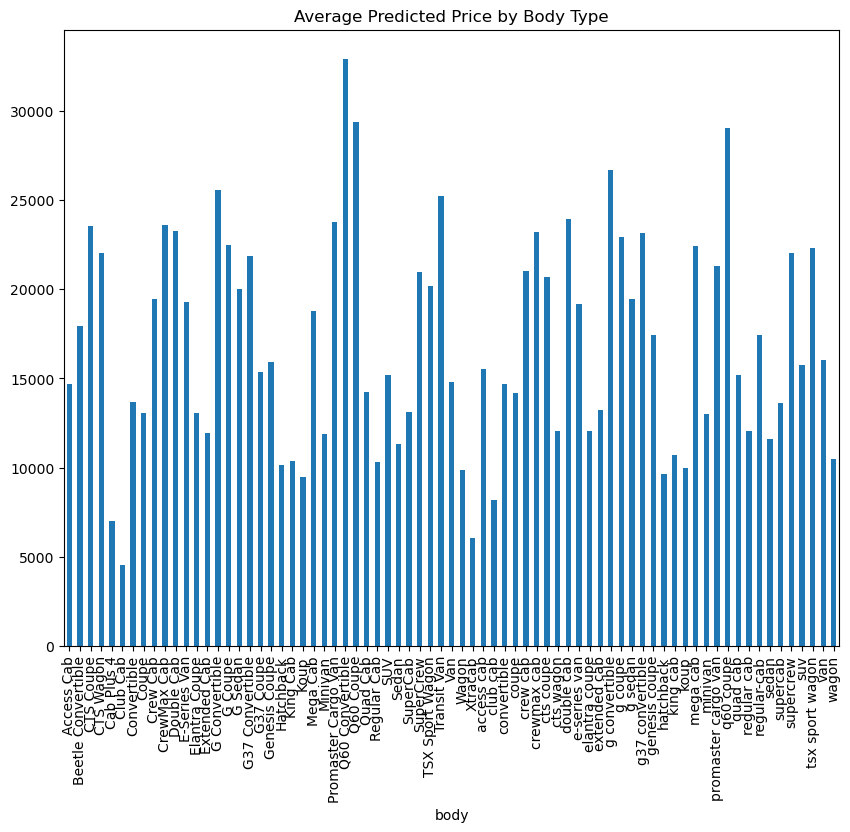

In [32]:
# Calculate average predicted prices for different make and body types
avg_price_by_body = original_test_data.groupby('body')['predicted_price'].mean()

# Visualize the result
plt.figure(figsize=(10, 8))  # Change the size as needed
avg_price_by_body.plot(kind='bar', title='Average Predicted Price by Body Type')
plt.xticks(rotation=90)
plt.show()



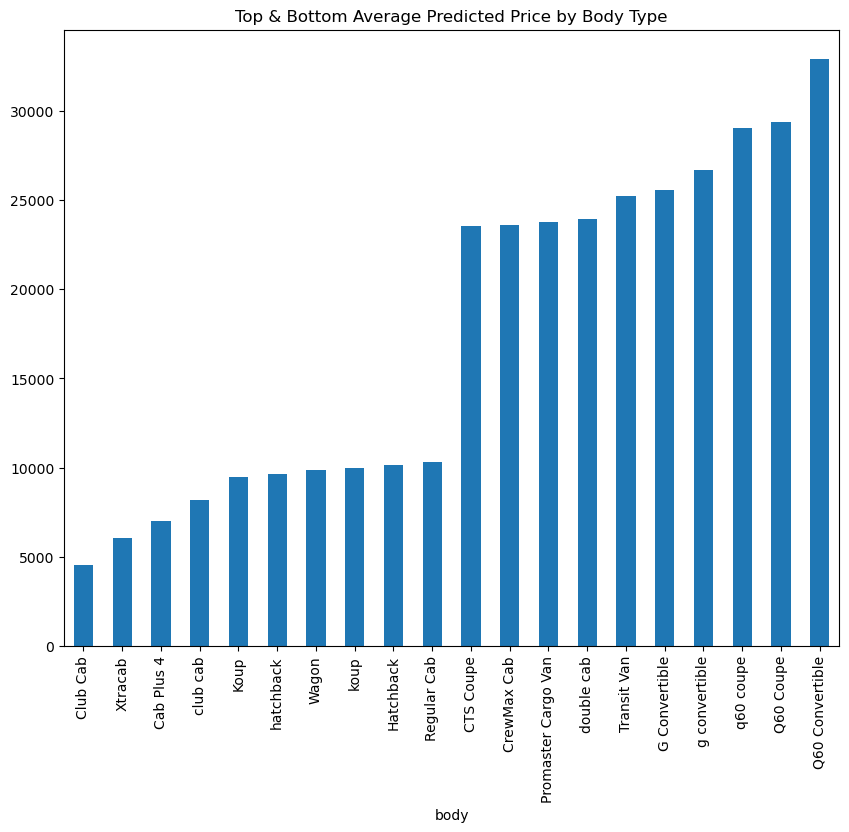

In [33]:
# Sort the series from lowest to highest average price
sorted_avg_price_by_body = avg_price_by_body.sort_values()

# Select the bottom 10 and top 10
bottom_10 = sorted_avg_price_by_body[:10]
top_10 = sorted_avg_price_by_body[-10:]

# Combine them into a single Series for plotting
top_bottom_10 = pd.concat([bottom_10, top_10])

# Visualize the result
plt.figure(figsize=(10, 8))  # Adjust the size as needed
top_bottom_10.plot(kind='bar', title='Top & Bottom Average Predicted Price by Body Type')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.show()


To further dissect our primary business question, we specifically focus on the influence of a car's body type on its predicted resale value at auctions. This analysis aims to reveal patterns and trends associated with different car body styles, providing insights into consumer preferences and potential market valuations.

The following steps were taken to perform the body type analysis:

Grouping by Body Type: We grouped the predicted prices in the original test dataset by the 'body' feature. Grouping data this way allows us to analyze the resale value according to the body type of the cars, isolating the effect of this specific attribute.

Calculating Average Predicted Prices: We computed the mean predicted price for each body type, which serves as an estimate of the expected resale value that the market might assign to cars of each body type category.

Visualization of Results: We plotted these averages using a bar chart, a visualization technique that clearly shows the comparative differences in predicted resale values across various body types.

This visualization strategy was chosen because it presents a straightforward comparison across different categories, making it easier to interpret the results. The use of bar charts allows us to readily identify which body types are associated with higher or lower resale values, which is directly relevant to the sub-question.

Insights from the Bar Chart
The bar chart details the car body types with the highest and lowest average predicted resale values, providing a clear depiction of market valuation as per our model's predictions. Notably, body types such as 'Convertible', 'G Coupe', 'G Convertible', 'Q60 Coupe', and 'Q60 Convertible' feature among the highest average predicted values. This trend suggests that luxury coupes and convertibles are highly valued in the resale market, which could be attributed to their style, performance, and desirability.

On the other end of the spectrum, body types like 'Club Cab', 'Galant', 'Cab Plus 4', 'Club Coupe', and 'Hatchback' are among those with the lowest average predicted values. These could represent less popular models, models that depreciate faster, or more commonly available vehicles, which typically command lower prices at auctions.

Car dealerships can use this specific information to prioritize certain body types that are likely to yield higher resale values. Investing in models such as the 'Q60 Convertible' or 'G Convertible' could be strategically advantageous for resale purposes. Conversely, awareness of models with lower predicted resale values can help dealers manage inventory more effectively, possibly by diversifying or adjusting pricing strategies to enhance the attractiveness of these vehicles.

This enhanced analysis underscores the significant role of body type in determining a car's resale value at auctions. Dealers can leverage this information to optimize their vehicle portfolio, catering to consumer demand patterns and maximizing profitability. The data suggests a distinct preference for luxury and performance-oriented body types in the resale market, which can inform targeted procurement and sales strategies.

### How does the age of a car impact its selling price?

<Axes: title={'center': 'Average Predicted Price by Car Age'}, xlabel='car age'>

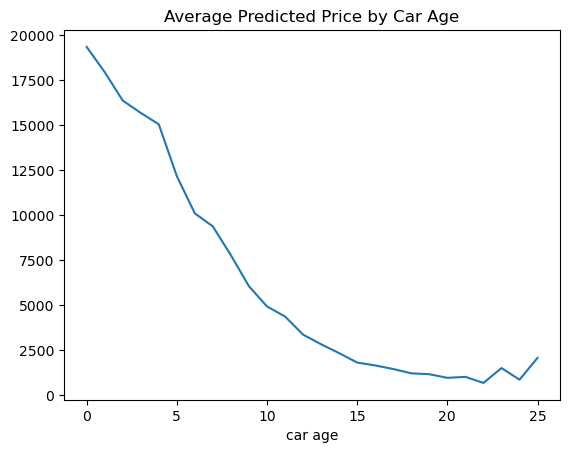

In [10]:
avg_price_by_age = original_test_data.groupby('car age')['predicted_price'].mean()
avg_price_by_age.plot(kind='line', title='Average Predicted Price by Car Age')


To explore how the age of a car impacts its selling price, we conducted an analysis to observe the relationship between car age and average predicted resale value. Understanding this relationship is vital as it can reflect the depreciation rate of vehicles and inform optimal timing for sales.

The approach for this analysis involved the following steps:

Grouping by Car Age: We grouped the predicted prices in the original test dataset by the 'car age' feature. This grouping allows us to analyze how the resale value changes as cars age.

Calculating Average Predicted Prices: For each car age group, we calculated the mean predicted price. These averages are expected to show a trend that can indicate how much age affects the resale value.

Line Plot Visualization: We chose a line plot to visualize the data, as it is particularly effective for showing trends over a continuous variable, like age. This type of plot makes it easy to observe the general pattern of depreciation over time.

The line plot illustrates a clear downward trend, indicating that the average predicted resale value decreases as the car age increases. This trend is consistent with typical depreciation patterns where a car loses value over time due to wear and tear, technological obsolescence, and other factors.

The provided plot suggests a relatively steep decline in value within the first few years, which gradually levels off as the car becomes older. This pattern could be indicative of the "sweet spot" where a car maintains a more stable value after an initial period of rapid depreciation.

For car dealerships, this information is crucial. It suggests that relatively newer used cars (e.g., those that are 1-3 years old) may experience a sharper drop in resale value compared to older models. Dealers might leverage this knowledge to adjust their purchasing strategies, perhaps focusing on acquiring vehicles at an age where the rate of depreciation has slowed, thereby maximizing their resale value.

The analysis confirms that car age has a significant impact on its resale value, with newer cars depreciating more quickly than older ones. Understanding this trend can help dealerships and individual sellers make informed decisions about the timing of car sales to maximize returns. It can also guide buyers interested in used cars about the potential future value of their investments.

### How do the condition and mileage (odometer reading) of a car correlate with its selling price in auctions?

<Axes: title={'center': 'Average Predicted Price by Odometer Log'}, xlabel='odometer_log'>

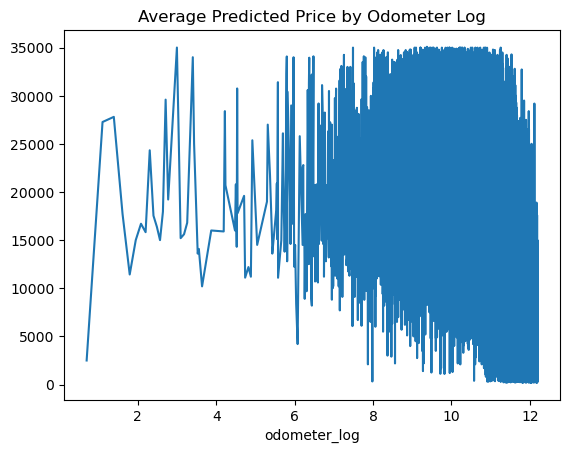

In [13]:

avg_price_by_odometer = original_test_data.groupby('odometer_log')['predicted_price'].mean()

avg_price_by_odometer.plot(kind='line', title='Average Predicted Price by Odometer Log')


<Axes: title={'center': 'Average Predicted Price by condition'}, xlabel='condition'>

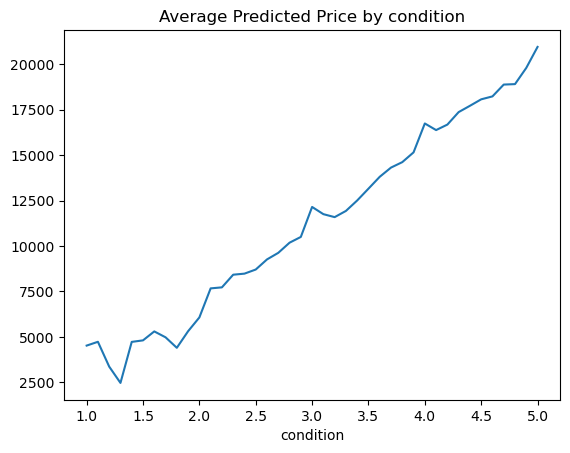

In [35]:
avg_price_by_condition = original_test_data.groupby('condition')['predicted_price'].mean()
avg_price_by_condition.plot(kind='line', title='Average Predicted Price by condition')

The sub-question addresses how the physical condition and mileage of a car, as reflected in odometer readings, influence its selling price at auctions. These factors are traditionally indicative of a vehicle's wear and tear, and thus, they are crucial determinants of its value in the used car market.

We conducted two separate analyses to explore these relationships:

For Mileage: We calculated the average predicted price grouped by the logarithm of the odometer reading (odometer_log). The log transformation normalizes the wide range of odometer readings, making patterns more discernible and managing the skewness typically present in mileage data.

For Condition: We grouped the average predicted price by the car's condition rating. This condition is typically on a scale reflecting the overall state of the car, with higher numbers indicating a better condition.

Both groupings were then visualized using line plots.

The logarithmic transformation of the odometer readings was essential because it turns a potentially exponential relationship into a linear one, which is easier to model and interpret. It also helps to smooth out the variance, providing a clearer view of the trend.

Mileage Plot: The plot related to odometer readings shows that as the log of mileage increases, the average predicted price generally declines. This trend is consistent with the expectation that higher mileage, which suggests more usage, correlates with lower car values.

Condition Plot: The plot illustrating the relationship with the car's condition indicates a clear positive trend. As the condition rating improves, the average predicted price increases. This suggests that buyers value cars in better condition and are willing to pay more for such vehicles.


These findings reinforce the conventional wisdom that cars in better condition and with lower mileage retain higher resale values. This information can be vital for auction houses and sellers, suggesting that vehicles with lower mileage and better condition ratings are likely to attract higher bids.

The analysis underlines the importance of accurate vehicle assessments and transparent reporting of condition and mileage. Sellers could potentially invest in refurbishing and servicing cars to improve their condition before sale, potentially increasing their market value. Buyers, on the other hand, may use these insights to assess the fair value of a car and make informed bidding decisions.

The condition and mileage of a car have clear and direct correlations with its selling price in auctions. Cars that are in better condition and with lower mileage command higher prices, reflecting their greater value to buyers. Understanding these relationships can guide sellers in setting reserve prices and buyers in determining their bidding strategies.

### Are there any geographical trends in the resale value of cars, based on the state where the auction is held?

<Axes: title={'center': 'Average Predicted Price by State'}, xlabel='state'>

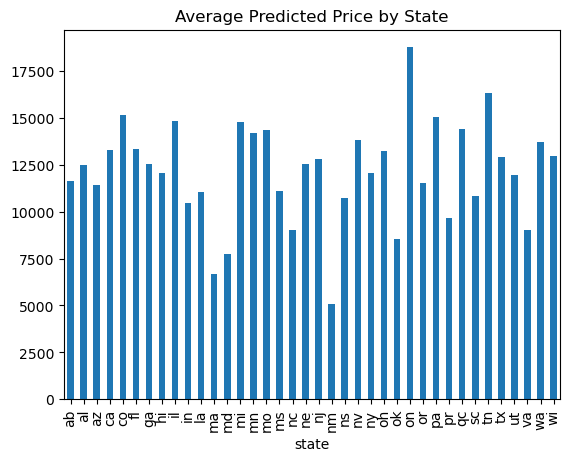

In [14]:
avg_price_by_state = original_test_data.groupby('state')['predicted_price'].mean()
avg_price_by_state.plot(kind='bar', title='Average Predicted Price by State')


To answer the question of whether geographical location influences the resale value of cars, we have analyzed the average predicted prices based on the state where the auction is held. This can help reveal if there are certain states where cars tend to have higher or lower resale values.

The steps we took in this analysis are:

Grouping by State: We grouped our dataset by the 'state' column, which represents the location where the auction took place. This allows us to observe the average resale value across different geographical locations.

Average Predicted Price Calculation: For each state, we calculated the average predicted resale price from the model's predictions. These averages can provide insights into state-by-state resale value trends.

Bar Chart Visualization: The average predicted prices by state were then visualized in a bar chart. A bar chart is particularly effective for comparing categorical data like states, enabling us to quickly identify which states are associated with higher or lower resale values.

A bar chart is an ideal choice for visualizing this type of data because it clearly shows the variation in average predicted prices across states, which could be influenced by factors such as local economic conditions, supply and demand, and regional preferences for certain types of vehicles.

The bar chart exhibits noticeable variation in average predicted prices among different states. Some states stand out with higher average prices, which could suggest a stronger demand for used cars or a more robust economic climate that allows for higher pricing. Conversely, states with lower average predicted prices might reflect less demand or greater availability of used cars, leading to lower prices.

For stakeholders in the used car market, these insights are valuable for tailoring inventory and pricing strategies to specific regions. Car dealers can adjust their stock profiles to match the state-specific demand, potentially increasing their profit margins by focusing on states with higher average resale values.

Geographic location has a significant impact on the resale value of cars at auctions. There are clear state-based trends in the average resale prices, suggesting that location is a significant factor in car valuation. For businesses operating in the used car market, these insights can inform strategic decisions related to procurement, distribution, and pricing strategies to align with geographic market dynamics.

## 9. Conclusion
The primary business question focused on identifying the factors that significantly impact the resale value of used cars in auctions and how dealerships can leverage this information to maximize their profits. Based on the comprehensive analysis conducted, we have identified several key factors:

### Make and Model
Our findings indicate that luxury and performance-oriented vehicles, particularly certain makes and models such as luxury convertibles and coupes, are associated with higher resale values. Car dealerships can leverage this by stocking high-demand models to attract premium pricing.

### Car Age
The age of a car significantly affects its resale value, with newer cars experiencing a more rapid depreciation in the initial years. Dealerships might find it advantageous to focus on vehicles that have passed the initial steep depreciation curve, potentially offering better value retention over time.

### Condition
The physical condition of a car has a positive correlation with its resale value. Cars in better condition command higher prices. Dealerships can invest in refurbishing used cars to enhance their condition before sale, potentially increasing their market value.

### Mileage
Higher mileage, which is often associated with greater wear and usage, correlates with lower resale values. Dealerships may prioritize acquiring and selling lower-mileage cars or adjust pricing strategies to reflect the higher mileage.

### Geographic Location
There are geographic trends in car resale values, with certain states exhibiting higher average resale prices than others. This could be due to regional economic conditions, supply and demand, or preferences for certain types of vehicles. Dealerships could adjust their inventory to match state-specific demands.

### Utilizing the Insights
Car dealerships can maximize their profits by:

Strategic Inventory Management: Prioritizing makes and models with higher resale values and adjusting inventory based on car age and condition to balance the cost of procurement against potential resale value.

Targeted Refurbishment: Investing in the refurbishment of cars to improve their condition, making them more appealing to buyers and thus commanding higher resale prices.

Pricing Strategy: Developing pricing strategies that reflect the vehicle's make, model, age, condition, and mileage, as well as tailoring these strategies to specific regional markets.

Regional Focus: Aligning sales strategies with geographic trends, potentially targeting states where higher resale values can be achieved.

In conclusion, by understanding and acting on these factors, car dealerships can make data-driven decisions that align with market dynamics, thereby enhancing their competitiveness and profitability in the used car market.

## 10.Reflection
Finally, we want to talk about the reflection part. During the entire process, every member of the group showed a strong desire to participate and cooperated smoothly. Everyone contributed a reasonable amount of work.

## Reference
Dong, G., Duan, L., Nummenmaa, J., & Zhang, P. (2018). Feature generation and feature engineering for sequences. Feature Engineering for Machine Learning and Data Analytics, 145–166. https://doi.org/10.1201/9781315181080-6 

Gavazza, A., Lizzeri, A., & Roketskiy, N. (2012). A quantitative analysis of the used-car market. SSRN Electronic Journal. https://doi.org/10.2139/ssrn.2046363 
Joo, C., Park, H., Kwon, H., Lim, J., Shin, E., Cho, H., & Kim, J. (2022). Machine learning approach to predict physical properties of polypropylene composites: Application of MLR, DNN, and Random Forest to industrial data. Polymers, 14(17), 3500. https://doi.org/10.3390/polym14173500 

Lin, H., Chen, Z., & Wu, S. (2021). Influencing factors of users’ intention to purchase in the online used car market in China. 2021 5th International Conference on Business and Information Management. https://doi.org/10.1145/3483794.3483796 

Ma, Y., Tang, J., & Aggarwal, C. (2018). Feature engineering for Data Streams. Feature Engineering for Machine Learning and Data Analytics, 117–143. https://doi.org/10.1201/9781315181080-5 

Rane, M., Patil, M., Rane, N., & Amune, A. (2023). Random Forest Regressor Approach for predicting resale value of used vehicles (RFRVP). 2023 Third International Conference on Advances in Electrical, Computing, Communication and Sustainable Technologies (ICAECT). https://doi.org/10.1109/icaect57570.2023.10118285 

Siddu P Algur, Suraj Jain., & Prashant Bhat. (2017). Abnormal facebook multimedia detection on facebook using IQR method. International Journal of Computer Sciences and Engineering, 5(8), 141–146. https://doi.org/10.26438/ijcse/v5i8.141146 

Varshitha, J., Jahnavi, K., & Lakshmi, C. (2022). Prediction of used car prices using artificial neural networks and machine learning. 2022 International Conference on Computer Communication and Informatics (ICCCI). https://doi.org/10.1109/iccci54379.2022.9740817 